In [79]:
import dlib
import imutils
import cv2
from imutils import face_utils
import matplotlib.pyplot as plt

In [80]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("model/shape_predictor_68_face_landmarks.dat")

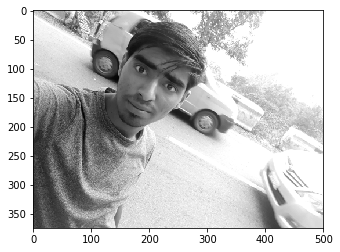

In [81]:
image = cv2.imread("test_image/my.jpg")
image = imutils.resize(image,width=500)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
orig = image.copy()
plt.imshow(image,cmap="gray")

In [82]:
reacts = detector(image,1)

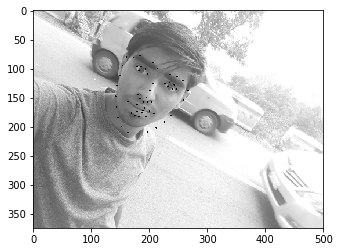

In [83]:
for (i,react) in enumerate(reacts):
    shape = predictor(image,react)
    shape = face_utils.shape_to_np(shape)
    
    for (x,y) in shape:
        cv2.circle(image,(x,y),1,(0,0,255),-1)
plt.imshow(image,cmap="gray")

In [84]:
FACIAL_LANDMARKS_IDXS = [
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 48)),
	("nose", (27, 35)),
	("jaw", (0, 17))
]

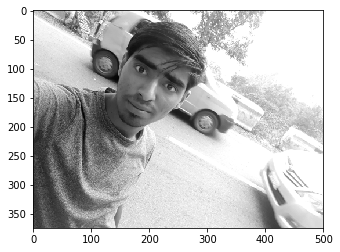

In [85]:
for (i,react) in enumerate(reacts):
    shape = predictor(image,react)
    shape = face_utils.shape_to_np(shape)
    mouth = shape[48:68]
    mouthi = orig.copy()
    for (x,y) in mouth:
        cv2.circle(mouth,(x,y),1,(0,0,255),-1)
plt.imshow(mouthi,cmap="gray")

In [92]:
rect = cv2.boundingRect(mouth)
x,y,w,h = rect

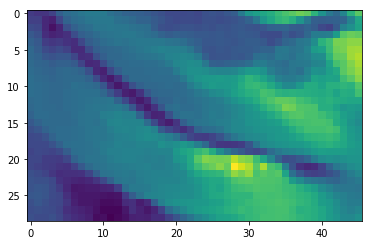

In [96]:
roi = orig[y:y+h,x:x+w]
plt.imshow(roi)